<a id='top'></a>
---

# Time Domain to Frequency Domain  
## A Journey Through the Fast Fourier Transform  
* Language: Python 3.7  
* Required Libraries + Used Versions: Numpy @ 1.17.3 + Scipy @ 1.3.1 + Matplotlib @ 3.1.1 
* Author: Leo Bach 2019
* Email: leo@machinesaver.net
### Table of Contents:
[Part 1: Simple Sinewave Signal](#part1)  
[Part 2: Fast Fourier Transform (FFT) Algorithm](#part2)  
[Part 3: Complex/Multiple Sinewave Signal](#part3)  
[Part 4: Nyquist + Sampling Rate](#part4)  
[Part 5: Fs > 2*(Highest Frequency) - Nyquist and Our Spectrum](#part5)  
[Part 6: Windowing](#part6)  
* Bin Bleed Through  (incomplete)
* Shaft Position Unknown  (incomplete)
* Hamming Window  (incomplete)  
[Part 7: Dealing with Realworld Signals](#part7)  
* Averaging (incomplete)
* 2.56 x Highest Frequency (Highest Frequency expected to be contained in the Signal)
    Magic Number Industry Standard (incomplete)  
[Additional Resources](#resources)  

In [1]:
# import the neccessary libraries
import matplotlib.pyplot as plt      # charting library
from scipy.fftpack import fft        # fast fourier transform algorithm
import numpy as np                   # number manipulation - for creating time arrays and frequency bins arrays
from math import pi                  # the value for pi

<a id='part1'></a>
---

## Part One --- Simple Sinewave Signal
1. Create a sinewave signal in an array.
2. Produce an array for amplitude (y-axis) and an array for time (x-axis) to be plotted in the Timewave Form Chart.
3. Generate the Timewave Form Chart from the two arrays.

In [2]:
Fs = 1000                            # sampling frequency hertz.
f = 20                               # sinewave signal frequency of 20hz.
t = np.arange(0,1,1/Fs)              # create a range of numbers from 0 to 1 at a specified interval (1/FrequencySampleRate).
y = 1*np.sin(2*pi*f*t)               # create a list of all the amplitude values (y-axis of our timewave form) of a 20Hz sinewave signal with an amplitude of 1.

In [3]:
print(y)                             # examine the values of the signal in the sinewave array

[ 0.00000000e+00  1.25333234e-01  2.48689887e-01  3.68124553e-01
  4.81753674e-01  5.87785252e-01  6.84547106e-01  7.70513243e-01
  8.44327926e-01  9.04827052e-01  9.51056516e-01  9.82287251e-01
  9.98026728e-01  9.98026728e-01  9.82287251e-01  9.51056516e-01
  9.04827052e-01  8.44327926e-01  7.70513243e-01  6.84547106e-01
  5.87785252e-01  4.81753674e-01  3.68124553e-01  2.48689887e-01
  1.25333234e-01  1.22464680e-16 -1.25333234e-01 -2.48689887e-01
 -3.68124553e-01 -4.81753674e-01 -5.87785252e-01 -6.84547106e-01
 -7.70513243e-01 -8.44327926e-01 -9.04827052e-01 -9.51056516e-01
 -9.82287251e-01 -9.98026728e-01 -9.98026728e-01 -9.82287251e-01
 -9.51056516e-01 -9.04827052e-01 -8.44327926e-01 -7.70513243e-01
 -6.84547106e-01 -5.87785252e-01 -4.81753674e-01 -3.68124553e-01
 -2.48689887e-01 -1.25333234e-01 -2.44929360e-16  1.25333234e-01
  2.48689887e-01  3.68124553e-01  4.81753674e-01  5.87785252e-01
  6.84547106e-01  7.70513243e-01  8.44327926e-01  9.04827052e-01
  9.51056516e-01  9.82287

In [4]:
print(t)                             # examine the values of the time array

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

In [5]:
# verify amplitude array and time array contain the same number of values
print('Elements in sinewave amplitude array: '+str(np.size(y)))
print('Elements in time array: '+str(np.size(t)))

Elements in sinewave amplitude array: 1000
Elements in time array: 1000


In [6]:
plt.plot(t,y)                                    # create the timewave form plot for the generated sinewave
plt.title('Timewave Form Chart - Sinusoidal Signal')   
plt.xlabel('Time(s)')                            # time array (t) as the x-axis
plt.ylabel('Amplitude')                          # amplitude array (y) as the y-axis

Text(0, 0.5, 'Amplitude')

In [7]:
plt.stem(t,y, use_line_collection=True)          # alternate plot type using a stem plot (shows actual samples) create the timewave form plot from the generated sinewave
plt.title('Alternate Stem Style Timewave Form Chart - Sinusoidal Signal')   
plt.xlabel('Time(s)')                            # time array (t) as the x-axis
plt.ylabel('Amplitude')                          # amplitude array (y) as the y-axis

Text(0, 0.5, 'Amplitude')

<a id='part2'></a>
---

## Part 2 --- Fast Fourier Transform Algorithm
1. Run the previously generated simple sinewave signal array through an FFT (Fast Fourrier Transform) algorithm.
2. Remove mirrored values which reflect across the Nyquist point after converting the complex FFT array elements from imaginary domain into real domain by taking the absolute value of each element.
3. Reduce the values of the chart's x-axis to only show the frequency that can be resolved for based on Nyquist theorem.
4. Normalize the amplitude values to match the amplitude of our generated simple sinewave signal.

In [8]:
y1 = fft(y)                     # Compute FFT array by passing y (the array of amplitudes of the previously generated simple sinewave signal) to scipy's fftpack's FFT function 
print(y1)                       # Examine the values of the FFT array

[ 5.71934931e-15+0.00000000e+00j  9.77053870e-14+1.63476215e-14j
  1.65518851e-13+7.16163090e-14j  1.74739617e-13-9.33580923e-14j
  7.29546027e-14+3.16565675e-13j  9.08518012e-14+2.81267078e-13j
 -1.46840968e-13-6.22546341e-14j -2.84454279e-14+1.69427888e-13j
 -6.36932285e-14+5.75728797e-14j  8.01486466e-14+1.79116663e-13j
 -3.62663921e-14+3.90673017e-14j  1.34365661e-14+3.55177506e-13j
 -4.52347426e-13+2.27167430e-13j -3.32957007e-13-3.20699235e-13j
  2.21708402e-14+3.25193209e-15j -6.12656695e-14-2.10788585e-14j
  2.72938249e-14-1.02608237e-14j -1.06975749e-13-5.07036541e-15j
 -4.82280169e-14+6.49551682e-14j -2.84660661e-14+6.98483319e-14j
 -4.81536987e-13-5.00000000e+02j -8.01533534e-14-1.83291361e-13j
  4.87320179e-14-8.50542247e-14j -8.74206885e-14-1.66471299e-14j
  3.81781224e-14-9.38488499e-14j -1.07151441e-13-2.63241077e-14j
  1.03015829e-13-7.41441510e-15j -2.07072948e-13+3.17615914e-13j
 -4.94457211e-13-3.20280457e-13j  2.01444567e-13-3.11686206e-13j
 -7.62433685e-14-4.785811

#### Notice the 'j' value trailing in the second portion of each item in our FFT array after running the simple sinewave signal through the FFT function.
#### This indicates that the values are complex.
* The real portion of each element are Amplitudes which we are interested in for this exercise.
* The imaginary portion of the value have to do with Phase which we are not interested in for this exercise.

In [9]:
plt.plot(y1) # the array generated by the FFT Algorithm (y1) contains complex values (it will have an Amplitude which is the real portion of the number and Phase which is the imaginary portion of the number) for our purposes we are only concerned with Amplitude so we need to retain the real value while discarding the imaginary portion of each element
plt.title('Attempted Complex Spectrum Chart')
plt.xlabel('Time Array')
plt.ylabel('y1')

C:\Users\Lukeb\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y1')

#### This graph is merely for demonstration (we don't want to use this for analysis) 
We are not particularly interested in this graph for our final output but this is what happens if we try to plot the FFT points without removing the imaginary numbers and normalizing the data.
This plot is not particularly useful for our purposes.

In [10]:
plt.plot(abs(y1))                  # If we take the absolute value of each value in the FFT array we remove the imaginary component 
plt.title('Spectrum Chart (Has Nyquist Reflection + Not Normalized)')
plt.xlabel('Time Array')
plt.ylabel('Y1')

Text(0, 0.5, 'Y1')

#### Notice that there are two amplitudes in our spectrum plot one at the expected 20Hz and one at an unexpected 980Hz (unexpected because our simple sinewave signal only specified the former frequency of 20Hz).
* Why? The short answer is that the signal is reflected across the point at which Nyquist tells us we can resolve the signal based on our sampling frequency.
* [Duplicate Amplitudes Post FFT](https://stackoverflow.com/questions/8887896/why-does-my-kiss-fft-plot-show-duplicate-peaks-mirrored-on-the-y-axis)
* [More on Real vs Complex FFT](https://www.edaboard.com/showthread.php?144315-Real-DFT-and-Complex-DFT-in-Matlab)
* Since our sampling frequency was 1000Hz we can only resolve up to 500Hz (which is the reflection point as demonstrated above).

In [11]:
# Generate Frequency Bins (X-Axis) of our Spectrum Chart
n = np.size(t)                           # calculate how many elements are in the x-axis (time array) of the timewave form chart
Fbin = (Fs/2)*np.linspace(0,1,n/2)       # generate the frequency bins (x-axis of the spectrum chart that we are building) which is a sequence of evenly spaced values from 0 to half the number of elements in the time array.
                                         # we accomplish this by spacing these values out from 0 to 1 using numpy's linspace function and then multiply each value by half the sample rate to get the correct frequency bin in Hertz

y1_amplitude = abs(y1[0:np.size(Fbin)])  # cut down the number of elements in the FFT array to match the number of frequency bins due to Nyquist reflection point.

plt.plot(Fbin, y1_amplitude)             # create a non-normalized spectrum chart with the frequency bins calculated to reflect the sampling rate (thereby removing the reflection across the Nyquist point)
plt.title('Spectrum Chart (Nyquist Reflection Removed + Not Normalized)')
plt.xlabel('Frequency (Hz)')             # calculated frequency bins (Fbin) on our x-axis
plt.ylabel('y1_amplitude')               # non-normalized amplitudes (y1) on our y-axis

# Notice how the amplitude of the signal is not normalized (see how the amplitude is 500) instead of 1 which is our expected singal amplitude

C:\Users\Lukeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'y1_amplitude')

In [12]:
# analyze new variables and functions used in frequency bin creation & amplitude array element reduction
print("Elements in Time Array: "+str(np.size(t)))
print("Nyquist Reflection Point / Maximum Resolvable Frequency: "+str(Fs/2))
print("Evenly Spaced Array of Values from 0 - 1: "+str(np.linspace(0,1,np.size(t)/2)))
print("Evenly Spaced Array of Frequency Bins from 0 - Maximum Resolvable Frequency: "+str((Fs/2)*np.linspace(0,1,np.size(t)/2)))

Elements in Time Array: 1000
Nyquist Reflection Point / Maximum Resolvable Frequency: 500.0
Evenly Spaced Array of Values from 0 - 1: [0.         0.00200401 0.00400802 0.00601202 0.00801603 0.01002004
 0.01202405 0.01402806 0.01603206 0.01803607 0.02004008 0.02204409
 0.0240481  0.0260521  0.02805611 0.03006012 0.03206413 0.03406814
 0.03607214 0.03807615 0.04008016 0.04208417 0.04408818 0.04609218
 0.04809619 0.0501002  0.05210421 0.05410822 0.05611222 0.05811623
 0.06012024 0.06212425 0.06412826 0.06613226 0.06813627 0.07014028
 0.07214429 0.0741483  0.0761523  0.07815631 0.08016032 0.08216433
 0.08416834 0.08617234 0.08817635 0.09018036 0.09218437 0.09418838
 0.09619238 0.09819639 0.1002004  0.10220441 0.10420842 0.10621242
 0.10821643 0.11022044 0.11222445 0.11422846 0.11623246 0.11823647
 0.12024048 0.12224449 0.1242485  0.12625251 0.12825651 0.13026052
 0.13226453 0.13426854 0.13627255 0.13827655 0.14028056 0.14228457
 0.14428858 0.14629259 0.14829659 0.1503006  0.15230461 0.1543

C:\Users\Lukeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
C:\Users\Lukeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [13]:
# Examine the frequency bins x-axis of spectrum chart
print(Fbin)

[  0.           1.00200401   2.00400802   3.00601202   4.00801603
   5.01002004   6.01202405   7.01402806   8.01603206   9.01803607
  10.02004008  11.02204409  12.0240481   13.0260521   14.02805611
  15.03006012  16.03206413  17.03406814  18.03607214  19.03807615
  20.04008016  21.04208417  22.04408818  23.04609218  24.04809619
  25.0501002   26.05210421  27.05410822  28.05611222  29.05811623
  30.06012024  31.06212425  32.06412826  33.06613226  34.06813627
  35.07014028  36.07214429  37.0741483   38.0761523   39.07815631
  40.08016032  41.08216433  42.08416834  43.08617234  44.08817635
  45.09018036  46.09218437  47.09418838  48.09619238  49.09819639
  50.1002004   51.10220441  52.10420842  53.10621242  54.10821643
  55.11022044  56.11222445  57.11422846  58.11623246  59.11823647
  60.12024048  61.12224449  62.1242485   63.12625251  64.12825651
  65.13026052  66.13226453  67.13426854  68.13627255  69.13827655
  70.14028056  71.14228457  72.14428858  73.14629259  74.14829659
  75.15030

Text(0, 0.5, 'Amplitude (Normalized)')

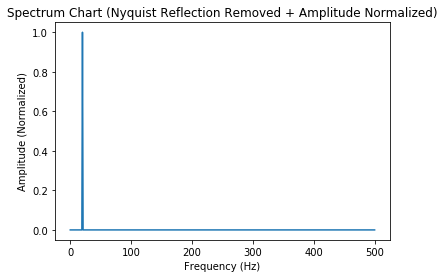

In [14]:
y1_normalized = (2/n)*abs(y1[0:np.size(Fbin)])                                   # Normalization of FFT amplitude array by multiplying the signal by (2/numberoftimearrayelements)

plt.plot(Fbin, y1_normalized)                      
plt.title('Spectrum Chart (Nyquist Reflection Removed + Amplitude Normalized)')  # clarify the spectrum chart by adding a title
plt.xlabel('Frequency (Hz)')                                                     # calculated frequency bins (Fbin) on our x-axis
plt.ylabel('Amplitude (Normalized)')                                             # just for plot formatting

<a id='part3'></a>
---

## Part 3 --- Complex/Multiple Sinewave Signal
1. Create a timewave form chart with multiple sinewaves as the components.
2. Repeat the process to plot and check values.
3. Run complex signal amplitudes through a FFT.
4. Verify that our example works on more than just a simple sinewave.


In [15]:
# Now we will add additional sinewaves into our original signal
Fs = 1500                                                                              # sampling frequency hertz
t = np.arange(0,1,1/Fs)                                                                # create a number from 0 to 1 at a specified interval (1/FrequencySampleRate)

amp1=1
freq1=20
signal_1=amp1*np.sin(2*pi*freq1*t)

amp2=0.5
freq2=355
signal_2=amp2*np.sin(2*pi*freq2*t)

amp3=2
freq3=1000
signal_3=amp3*np.sin(2*pi*freq3*t)

y3 = signal_1+signal_2+signal_3     # create a complex signal array (by adding together multiple sinewaves) with a 20 Hz & 1 amplitude, 355 Hz & 0.5 amplitude, and finally 1000 Hz & 2 amplitude.

Text(0, 0.5, 'y3 (complex sinewave signal)')

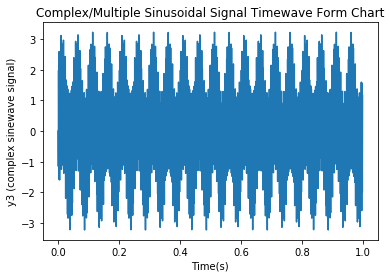

In [16]:
# create the plot for the complex timewave signal
plt.plot(t,y3)
plt.title('Complex/Multiple Sinusoidal Signal Timewave Form Chart')
plt.xlabel('Time(s)')
plt.ylabel('y3 (complex sinewave signal)')

In [17]:
# repeat the code to perform the FFT algorithm previously explained we see our first 2 sinewaves represented in the frequency domain but do not see our 3rd sinewave component 1000hz 2 amplitude signal. This makes sense because at 1000Hz sampling rate we cannot resolve for anything higher than a 500Hz signal.
n = np.size(t)                                    # number of elements in the time array
Fbin = (Fs/2)*np.linspace(0,1,n/2)                # elements in the frequency bin array

print(np.size(Fbin))

y4 = fft(y3)                                      # run newly generated complex time wave form through FFT algorithm
y4_normalized = (2/n)*abs(y4[0:np.size(Fbin)])    #

# plot and label
plt.plot(Fbin, y4_normalized)
plt.title('Spectrum Chart with Reflection')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')

750


C:\Users\Lukeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Magnitude')

## So in order to extend our frequency domain we must increase our sampling rate
* we will do this in the next example by changing the sampling rate to 2X the highest frequency that we expect to see.

<a id='part4'></a>
---

## Part 4 --- Focus on the Sample Rate
Looking at how sampling rate effects the ability to resolve for higher frequencies.

In [18]:
# Increase sampling frequency in an attempt to get the expected 1000Hz signal in the spectrum chart
Fs = 2000 # increased sampling frequency from 1X the highest frequency to 2X the highest frequency 
t = np.arange(0,1,1/Fs) #create a number from 0 to 1 second at a specified interval (1/FrequencySampleRate)
amp1=1
freq1=20

amp2=0.5
freq2=355

amp3=2
freq3=1000

x = amp1*np.sin(2*pi*freq1*t)+amp2*np.sin(2*pi*freq2*t)+amp3*np.sin(2*pi*freq3*t) # regenerate our complex signal (by adding together multiple sinewaves) with a 20hz 1amplitude, 355hz 0.5amplitude, and finally 1000hz 2amplitude but using our new sampling rate

In [19]:
# create the plot for the complex timewave signal with the new sampling rate
plt.plot(t,x)
plt.title('Sinusoidal Signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

In [20]:
n = np.size(t) 
fr = (Fs/2)*np.linspace(0,1,n/2)
X = fft(x)
X_magnitude = (2/n)*abs(X[0:np.size(fr)])

# plot and label
plt.plot(fr, X_magnitude); plt.title('Magnitude Spectrum')
plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude');
plt.tight_layout(); # just for plot formatting

C:\Users\Lukeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


### We still do not see our 1000Hz signal?!
* What gives?
* Well it turns out that the issue is that when we calculate our signal we get 1000 points which start at 0 - 999.
* So there is no place for a peak at 1000 because on our chart 1000 doesn't exist.

<a id='part5'></a>
---

## Part 5 --- Sampling Rate > 2 Times Highest Frequency

In [21]:
# Generate the sine wave
Fs = 2002 #sampling frequency hertz
t = np.arange(0,1,1/Fs) #create a number from 0 to 1 second at a specified interval (1/FrequencySampleRate)
amp1=1
freq1=20

amp2=0.5
freq2=355

amp3=2
freq3=1000

x = amp1*np.sin(2*pi*freq1*t)+amp2*np.sin(2*pi*freq2*t)+amp3*np.sin(2*pi*freq3*t) # regenerate our complex signal (by adding together multiple sinewaves) with a 20hz 1amplitude, 355hz 0.5amplitude, and finally 1000hz 2amplitude but using our new sampling rate

In [22]:
# create the plot for the complex timewave signal
plt.plot(t,x); plt.title('Sinusoidal Signal');
plt.xlabel('Time(s)'); plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

### Eureka! We can see that the timewave form changed when we increased the sampling rate to encompass the signal we were looking for!
Now we know that the signal should show up in our spectrum chart

C:\Users\Lukeb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Text(0, 0.5, 'Magnitude')

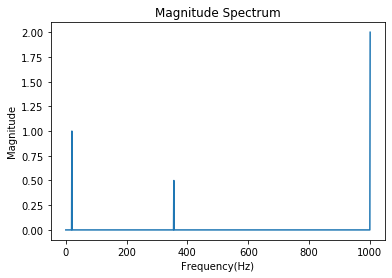

In [23]:
n = np.size(t) 
fr = (Fs/2)*np.linspace(0,1,n/2)
X = fft(x)
X_magnitude = (2/n)*abs(X[0:np.size(fr)])

plt.plot(fr, X_magnitude)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude')

### And as expected our 1000Hz signal does show up on our chart! Hooray Success!
# Congratulations you've graduated the introduction to Vibration Timewave Form and Spectrum!
# You should now have the skills necessary to take a vibration signal from the time domain to the frequency domain!

[Back to Top](#top)  

<a id='resources'></a>
---

## Additional Resources
[Digital Signal Plotting using Matplotlib](https://staff.fnwi.uva.nl/r.vandenboomgaard/SP20162017/SystemsSignals/plottingsignals.html)  